In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x105cd47d0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x105cd4450>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c345eecd0>)

In [6]:
mnist.train.images.shape
#55000 images, Each of them is a 28x28 (784) image

(55000, 784)

In [7]:
mnist.test.images.shape

(10000, 784)

In [8]:
mnist.validation.images.shape

(5000, 784)

In [9]:
mnist.train.labels.shape

(55000, 10)

In [10]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [11]:
# We need the Y labels to be one hot encoded as well
# i.e If it is 7, It should be [0,0,0,0,0,0,1,0,0]
# So we pass one_hot = True as well

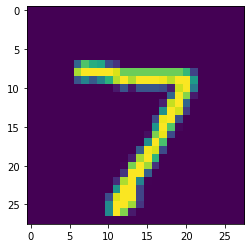

In [13]:
# Lets try to plot the image
image = mnist.test.images[0]
# image is flattened
image = image.reshape((28,28))
image

import numpy as np
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [14]:
with tf.Session() as sess:
    print(tf.random_normal([10,10]).eval())

# Returns a 10 x 10 

[[-2.5117671   0.188058   -1.8330877  -0.55434215  0.68668485 -0.7810005
   0.3833186   0.86436146  0.3145311  -0.9779863 ]
 [ 0.00842875  0.28446016 -2.0184689   1.1950829   1.389681   -1.8883369
   0.34321797 -1.555007    0.5318326   0.0811993 ]
 [ 0.9237874  -0.4487879  -1.0674745  -0.07601457 -0.31856722  0.41682926
  -0.01702774 -0.2592789   0.35007045 -1.0674953 ]
 [ 0.8532975   0.55655926  1.4107684  -0.14707899  0.4151163  -0.07555395
  -0.7489874  -1.125044   -1.0427625   3.4269807 ]
 [ 0.544688   -1.3323705   1.3087733   0.35427278  1.6126227   0.02422106
   0.20239411 -0.8952085   0.59676266 -0.56605726]
 [-0.36908677 -0.67826176  0.23971093  1.7349899   0.35888445 -0.88934845
   1.6795468  -0.72406936 -0.90170014 -0.32503632]
 [ 0.14981481  0.7102554  -0.03845934 -0.5317755   0.35267368  0.79637885
  -1.0551496   0.8470625  -0.6219799  -0.6292591 ]
 [ 0.11661342  0.48457173  0.39721182  1.4581212   0.8053332   1.5038155
  -1.320608    1.4786005  -0.49319848  1.193467  ]
 [ 

In [15]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

bias = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [16]:
def forward_propagation(x, weights, bias):
    in_layer1  = tf.add(tf.matmul(x, weights['h1']), bias['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2  = tf.add(tf.matmul(out_layer1, weights['h2']), bias['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output  = tf.add(tf.matmul(out_layer2, weights['out']), bias['out'])
    return output

In [17]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = tf.placeholder('float', shape = (None, n_input))
y = tf.placeholder( tf.int32 , shape = (None, n_classes))

In [18]:
pred = forward_propagation(x, weights, bias)
predictions = tf.argmax(pred, 1)
true_labels = tf.argmax(y   , 1)
correct_predictions = tf.equal(predictions, true_labels)

In [19]:
pred_eval, labels, correct_pred = sess.run((predictions, true_labels,correct_predictions), feed_dict = {
    x: mnist.train.images,
    y: mnist.train.labels
})
pred_eval, labels, correct_pred

(array([1, 5, 1, ..., 4, 4, 6]),
 array([7, 3, 4, ..., 5, 6, 8]),
 array([False, False, False, ..., False, False, False]))

In [20]:
correct_pred.sum()

5242

In [22]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))

In [23]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize = optimizer.minimize(cost)

In [24]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [25]:
batch_size = 100
for i in range(25):
    num_batches = mnist.train.num_examples  // batch_size
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimize], feed_dict = {
            x: batch_x,
            y: batch_y
        })
        total_cost += c
    print(total_cost)

27080.484858989716
4944.776055276394
2645.675828665495
1858.5742040966943
1372.2409523210492
1295.4240672492178
1135.4038628583348
952.5500904859387
872.6491025884878
831.6503744026361
691.0082217180748
651.962082219836
531.8282683811356
472.6774413220647
510.30637703094385
521.9308818845252
336.1750089059215
322.99503075998945
300.1148401464191
321.5970808898536
288.70939408284687
249.0087419892013
281.45154862653357
224.76741610513034
162.61593251188583


In [26]:
pred = forward_propagation(x, weights, bias)
predictions = tf.argmax(pred, 1)
true_labels = tf.argmax(y   , 1)
correct_predictions = tf.equal(predictions, true_labels)
pred_eval, labels, correct_pred = sess.run((predictions, true_labels,correct_predictions), feed_dict = {
    x: mnist.test.images,
    y: mnist.test.labels
})
correct_pred.sum()

9634